<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение графиков</a></span></li><li><span><a href="#Вычисление-потока-и-проницаемости" data-toc-modified-id="Вычисление-потока-и-проницаемости-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вычисление потока и проницаемости</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np
import os
from pathlib import Path

In [2]:
d = 16 * 10**(-3)
S = np.pi/4 * d**2

l = {
    '0%': 63 * 10**(-6),
    '0,05%': 63 * 10**(-6),
    '0,1%': 61 * 10**(-6),
    '0,2%': 60 * 10**(-6),
    '0,3%': 61 * 10**(-6),
    '0,4%': 70 * 10**(-6),
    '0,5%': 71 * 10**(-6)
    
}
'''
l = {
    '0%': 1,
    '0,05%': 1,
    '0,1%': 1,
    '0,2%': 1,
    '0,3%': 1,
    '0,4%': 1,
    '0,5%': 1
}
'''
p = 10**3
lower_pressure=10
upper_pressure=21
directory = Path(r'C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%')
graph_directory = Path(r'C:\Users\gizza\OneDrive\Desktop\Учеба\ПСФ+ОГ 20%\графики')


plt.rcParams.update({
    # Основные параметры шрифтов
    'font.size': 20,            # Размер основного текста
    'axes.titlesize': 18,       # Размер заголовка
    'axes.labelsize': 16,       # Размер подписей осей
    'xtick.labelsize': 12,      # Размер подписей по оси X
    'ytick.labelsize': 12,      # Размер подписей по оси Y
    'legend.fontsize': 14,      # Размер текста легенды
    'figure.titlesize': 16,     # Размер заголовка фигуры
    
    # Параметры сетки
    'axes.grid': True,          # Включить сетку
    'grid.linestyle': '--',     # Стиль линии (пунктирная)
    'grid.alpha': 0.8,          # Прозрачность сетки (80%)
    'grid.color': 'gray',       # Цвет сетки
    'grid.linewidth': 0.8,      # Толщина линий сетки
    'axes.axisbelow': True      # Сетка под графиками
})

## Загрузка данных

In [3]:
folders = ['0%', '0,05%', '0,1%', '0,2%', '0,3%', '0,4%', '0,5%']
directories = {}
for folder in folders:
    (directory / folder).mkdir(exist_ok=True)
    directories[folder] = (directory / folder)

In [4]:
def preprocessing(directory):
    # Проходим по всем файлам в папке
    for filename in os.listdir(directory):
        if filename.startswith('обработанные'):
            print(directory)
            print("Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.")
            return  # Завершение функции, если такие файлы найдены
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):  # Проверяем, что файл имеет расширение .txt
            input_file = os.path.join(directory, filename)  # Полный путь к входному файлу
            output_file = os.path.join(directory, f'обработанные_{filename}')  # Полный путь к выходному файлу

            # Чтение содержимого файла
            with open(input_file, 'r', encoding='utf-8') as file:
                lines = file.readlines()

            # Удаление первых 19 строк
            filtered_lines = lines[19:]

            # Запись отфильтрованных строк в новый файл
            with open(output_file, 'w', encoding='utf-8') as file:
                file.writelines(filtered_lines)
    print(directory)
    print("Обработка завершена.")

In [5]:
def dataframe_load(directory):
    dataframes = []

    # Проходим по всем файлам в папке
    for filename in os.listdir(directory):
        if filename.startswith('обработанные'):  # Проверяем, что файл имеет расширение .txt
            input_file = os.path.join(directory, filename)  # Полный путь к входному файлу

            # Чтение содержимого файла в DataFrame
            df = pd.read_csv(input_file, sep=' ', encoding='utf-8')  # Укажите нужный разделитель
            dataframes.append(df)  # Добавляем DataFrame в список

    # Теперь у вас есть список DataFrame, каждый из которых соответствует текстовому файлу
    print("Обработка завершена.")
    return dataframes

In [6]:
dataframes = {}
for folder in directories:
    preprocessing(directories[folder])  # Выполнение предварительной обработки
    df_list = dataframe_load(directories[folder])  # Загрузка DataFrame

    # Формирование имени переменной
    variable_name = 'df_' + '_'.join(folder.replace(',', '_').replace('%', '').split())
    # Сохраняем в глобальную переменную
    globals()[variable_name] = df_list
    print(f'{variable_name} загружен с {len(df_list)} DataFrames')
    dataframes[folder] = df_list

C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Обработка завершена.
df_0 загружен с 3 DataFrames
C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0,05%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Обработка завершена.
df_0_05 загружен с 3 DataFrames
C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0,1%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Обработка завершена.
df_0_1 загружен с 3 DataFrames
C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0,2%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Обработка завершена.
df_0_2 загружен с 3 DataFrames
C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0,3%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.
Обработка завершена.
df_0_3 загружен с 3 DataFrames
C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%\0,4%
Файлы, н

In [7]:
for concentration in dataframes:
    for i, df in enumerate(dataframes[concentration]):
        df['position_mm_relative'] = df['position_mm_relative'] * (np.pi * 8**2) / 10**3

## Построение графиков

In [8]:
def plot_P_V(dataframes, title, save_path=None):
    save_path = save_path / 'P_V'
    plt.figure(figsize=(10, 5))

    for i, df in enumerate(dataframes):
        sns.lineplot(x='position_mm_relative', y='pressure_Atm', data=df, label=f'Измерение №{i + 1}')

    plt.title('Зависимость давления от объёма ' + title)
    plt.xlabel('Объём, см³')
    plt.ylabel('Давление, атм.')

    # Установка пределов осей
    plt.xlim(0, None)  # С нуля до максимума
    plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Объём', loc='upper left')

    # Покажите график
    file_name = 'P_V_' + title
    if save_path:
        plt.savefig(save_path / file_name)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_P_t(dataframes, title, save_path=None):
    save_path = save_path / 'P_t'
    for i, df in enumerate(dataframes):
        # Построение линии для каждого DataFrame
        sns.lineplot(x='time', y='pressure_Atm', data=df, label=f'Измерение №{i + 1}')

    # Добавление заголовка и меток осей
    plt.title('Зависимость давления от времени ' + title)
    plt.xlabel('Время, мс')
    plt.ylabel('Давление, атм.')

    # Установка пределов осей
    plt.xlim(0, None)  # С нуля до максимума
    plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Измерение', loc='upper right')
    file_name = 'P_t_' + title
    if save_path:
        plt.savefig(save_path / file_name)
    # Покажите график
    plt.tight_layout()
    plt.show()

(0.0, 2.5074989246475)

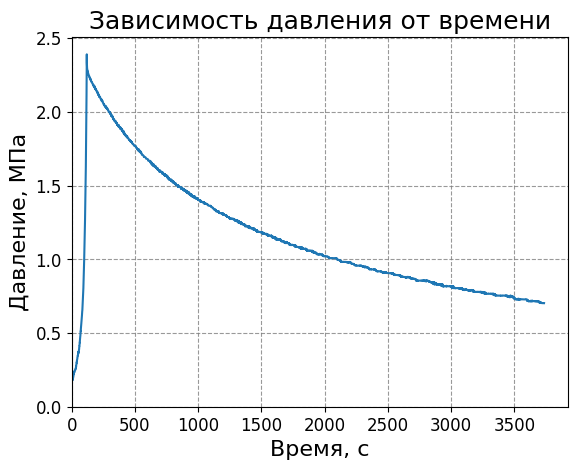

In [10]:
sns.lineplot(x=dataframes['0%'][0]['time'] / 10**3, y=dataframes['0%'][0]['pressure_Atm'] * 101325 / 10**6,
                     data=dataframes['0%'][0])
plt.title('Зависимость давления от времени')
plt.xlabel('Время, с')
plt.ylabel('Давление, МПа')
plt.xlim(0, None)  # С нуля до максимума
plt.ylim(0, None)  # С нуля до максимума

(0.0, 2.5074989246475)

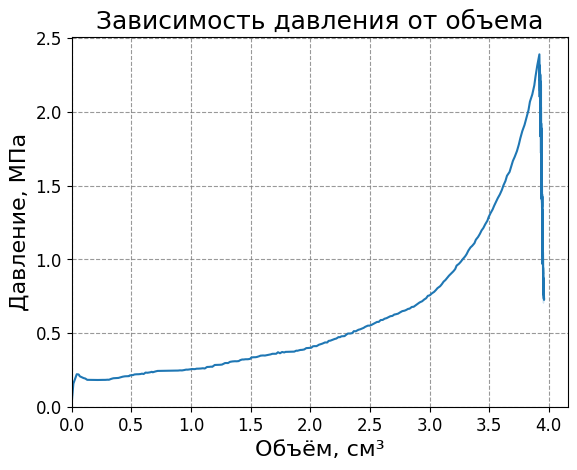

In [11]:
sns.lineplot(x=dataframes['0%'][0]['position_mm_relative'], y=dataframes['0%'][0]['pressure_Atm'] * 101325 / 10**6,
                     data=dataframes['0%'][0])
plt.title('Зависимость давления от объема')
plt.xlabel('Объём, см³')
plt.ylabel('Давление, МПа')
plt.xlim(0, None)  # С нуля до максимума
plt.ylim(0, None)  # С нуля до максимума

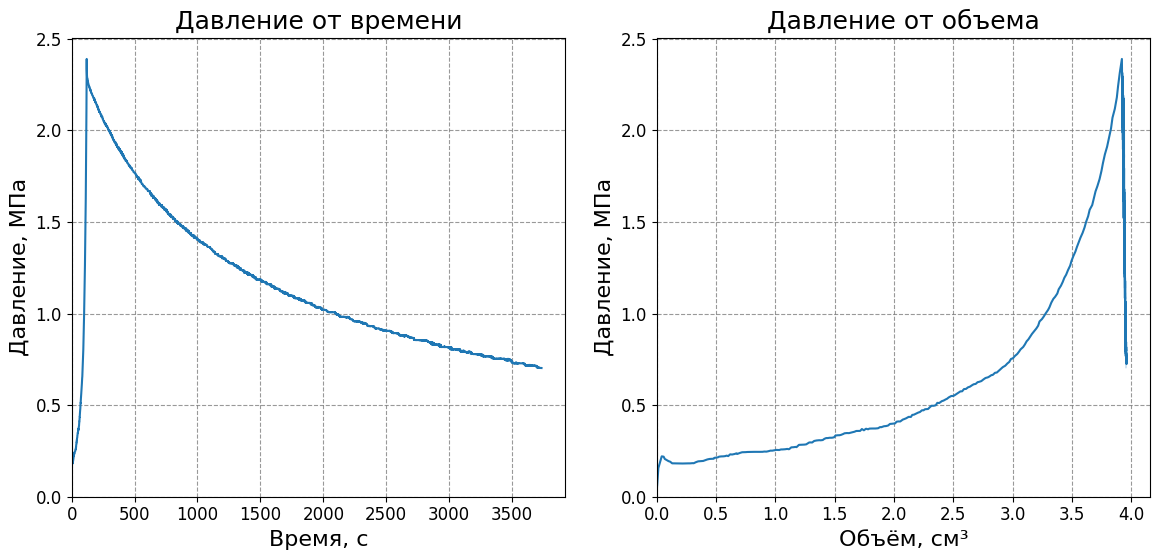

In [12]:
plt.figure(figsize=(12, 6))  # Увеличиваем высоту

# График 1: Давление от времени
plt.subplot(1, 2, 1)  # 2 строки, 1 столбец, позиция 1
sns.lineplot(
    x=dataframes['0%'][0]['time'] / 10**3,
    y=dataframes['0%'][0]['pressure_Atm'] * 101325 / 10**6,
    data=dataframes['0%'][0]
)
plt.title('Давление от времени')
plt.xlabel('Время, с')
plt.ylabel('Давление, МПа')
plt.xlim(0, None)
plt.ylim(0, None)

# График 2: Давление от объема
plt.subplot(1, 2, 2)  # 2 строки, 1 столбец, позиция 2
sns.lineplot(
    x=dataframes['0%'][0]['position_mm_relative'],
    y=dataframes['0%'][0]['pressure_Atm'] * 101325 / 10**6,
    data=dataframes['0%'][0]
)
plt.title('Давление от объема')
plt.xlabel('Объём, см³')
plt.ylabel('Давление, МПа')
plt.xlim(0, None)
plt.ylim(0, None)

plt.tight_layout()
plt.show()

In [13]:
def plot_P_V_combined(dataframes, save_path=None):
    # Создаем фигуру
    save_path = save_path / 'P_V'
    fig = plt.figure(figsize=(15, 15))

    # Рисуем первый график, который занимает всю первую строку
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # Занимает всю первую строку

    # Строим первый график (например, для первой концентрации)
    concentration = list(dataframes.keys())[0]  # Берем первую концентрацию
    for j in range(len(dataframes[concentration])):
        sns.lineplot(ax=ax1, x='position_mm_relative', y='pressure_Atm',
                     data=dataframes[concentration][j],
                     label=f'Измерение №{j + 1}')

    ax1.set_title(f'Зависимость давления от объема: {concentration}')
    ax1.set_xlabel('Объем, см³')
    ax1.set_ylabel('Давление, атм.')
    ax1.set_xlim(0, None)
    ax1.set_ylim(0, None)
    ax1.grid()
    ax1.legend(loc='upper right')

    # Индекс для остальных графиков
    idx = 0  # Начинаем со второго ряда (индекс 1)

    # Рисуем остальные графики по два в строке
    for i, concentration in enumerate(dataframes):
        if i == 0:  # Пропускаем первую концентрацию (уже нарисована)
            continue

        ax = plt.subplot2grid((4, 2), (idx // 2 + 1, idx % 2))  # Занимает одну ячейку
        for j in range(len(dataframes[concentration])):
            sns.lineplot(ax=ax, x='position_mm_relative', y='pressure_Atm',
                         data=dataframes[concentration][j],
                         label=f'Измерение №{j + 1}')

        ax.set_title(f'Зависимость давления от объема: {concentration}')
        ax.set_xlabel('Объем, см³')
        ax.set_ylabel('Давление, атм.')
        ax.set_xlim(0, None)
        ax.set_ylim(0, None)
        ax.grid()
        ax.legend(loc='upper left')

        idx += 1
        
    if save_path:
        plt.savefig(save_path / 'P_V_combined', bbox_inches='tight')
        
    plt.tight_layout()  # Для лучшего представления графиков
    plt.show()  # Отображаем графики

In [14]:
def plot_P_t_combined(dataframes, save_path=None):
    # Создаем фигуру
    save_path = save_path / 'P_t'
    fig = plt.figure(figsize=(15, 15))
    
    # Рисуем первый график, который занимает всю первую строку
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # Занимает всю первую строку
    
    # Строим первый график (например, для первой концентрации)
    concentration = list(dataframes.keys())[0]  # Берем первую концентрацию
    for j in range(len(dataframes[concentration])):
        sns.lineplot(ax=ax1, x='time', y='pressure_Atm',
                     data=dataframes[concentration][j],
                     label=f'Измерение №{j + 1}')
    
    ax1.set_title(f'Зависимость давления от времени: {concentration}')
    ax1.set_xlabel('Время, мс')
    ax1.set_ylabel('Давление, атм.')
    ax1.set_xlim(0, None)
    ax1.set_ylim(0, None)
    ax1.grid()
    ax1.legend(loc='upper right')

    # Индекс для остальных графиков
    idx = 0  # Начинаем со второго ряда (индекс 1)

    # Рисуем остальные графики по два в строке
    for i, concentration in enumerate(dataframes):
        if i == 0:  # Пропускаем первую концентрацию (уже нарисована)
            continue
        
        ax = plt.subplot2grid((4, 2), (idx // 2 + 1, idx % 2))  # Занимает одну ячейку
        for j in range(len(dataframes[concentration])):
            sns.lineplot(ax=ax, x='time', y='pressure_Atm',
                         data=dataframes[concentration][j],
                         label=f'Измерение №{j + 1}')
        
        ax.set_title(f'Зависимость давления от времени: {concentration}')
        ax.set_xlabel('Время, мс')
        ax.set_ylabel('Давление, атм.')
        ax.set_xlim(0, None)
        ax.set_ylim(0, None)
        ax.grid()
        ax.legend(loc='upper right')

        idx += 1
    if save_path:
        plt.savefig(save_path / 'P_t_combined', bbox_inches='tight')
    plt.tight_layout()  # Для лучшего представления графиков
    plt.show()  # Отображаем графики

In [15]:
def plot_P_V_first(dataframes, save_path=None):
    plt.figure(figsize=(10, 6))
    save_path = save_path / 'P_V'
    for item in dataframes:
        sns.lineplot(data=dataframes[item][0], x='position_mm_relative', y='pressure_Atm', label=item)
    
    plt.title('Зависимость давления от объема для первых измерений')
    plt.xlabel('Объем, см³')
    plt.ylabel('Давление, атм.')

    # Установка пределов осей
    plt.xlim(0, None)  # С нуля до максимума
    plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Концентрация ОГ', loc='upper left')
    file_name = 'P_V_first_measurement'
    if save_path:
        plt.savefig(save_path / file_name, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [16]:
def plot_P_t_first(dataframes, save_path=None):
    save_path = save_path / 'P_t'
    plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры

    for item in dataframes:
        sns.lineplot(data=dataframes[item][0], x='time', y='pressure_Atm', label=item)  # Изменяем оси на 'time_s' и 'pressure_Atm'
    
    plt.title('Зависимость давления от времени для первых измерений')
    plt.xlabel('Время, мс')  # Изменяем метку на время
    plt.ylabel('Давление, атм.')

    # Установка пределов осей
    plt.xlim(0, None)  # С нуля до максимума
    plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Концентрация ОГ', loc='upper right')
    file_name = 'P_time_first_measurement'
    if save_path:
        plt.savefig(save_path / file_name, bbox_inches='tight')  # Добавляем bbox_inches для лучшей обрезки
    plt.tight_layout()
    plt.show()

In [17]:
preprocessing(directory)
df_stub = pd.read_csv(directory / 'обработанные_заглушка.csv', sep=' ', encoding='utf-8')

C:\Users\gizza\OneDrive\Desktop\Учеба\ИТЖМ\ПСФ+ОГ 20%
Файлы, начинающиеся на 'обработанные', уже существуют. Обработка завершена.


In [18]:
def approximation_polynomial(df_, lower_pressure, upper_pressure):
    # Находим индекс максимального значения в pressure_Atm
    df_list = []
    
    
    for df_item in df_:
        df = df_item.loc[(lower_pressure <= df_item['pressure_Atm']) & (df_item['pressure_Atm'] <= upper_pressure)]
        max_index = df['pressure_Atm'].idxmax()
        
        # Разделяем данные на две части
        df_charge = df.loc[:max_index]
        #df_charge = df_charge[(lower_pressure <= df_charge['pressure_Atm']) & (df_charge['pressure_Atm'] <= upper_pressure)]
        df_uncharge = df.loc[max_index:]
        #df_uncharge = df_uncharge[(lower_pressure <= df_uncharge['pressure_Atm']) & (df_uncharge['pressure_Atm'] <= upper_pressure)]
        

        # Полиномиальная регрессия для df_charge (2-й степени)
        coefficients_charge = np.polyfit(df_charge['pressure_Atm'], df_charge['position_mm_relative'], 2)
        polynomial_charge = np.poly1d(coefficients_charge)

        # Добавляем результаты для df_charge в DataFrame
        df.loc[:max_index, 'approximation_polynomial_charge'] = polynomial_charge(df_charge['pressure_Atm'])

        # Полиномиальная регрессия для df_uncharge (2-й степени)
        coefficients_uncharge = np.polyfit(df_uncharge['pressure_Atm'], df_uncharge['position_mm_relative'], 2)
        polynomial_uncharge = np.poly1d(coefficients_uncharge)

        # Добавляем результаты для df_uncharge в DataFrame
        df.loc[max_index:, 'approximation_polynomial_uncharge'] = polynomial_uncharge(df_uncharge['pressure_Atm'])

        # Формируем общий столбец с результатами для всей таблицы
        df['approximation_polynomial'] = (df['approximation_polynomial_charge']
                                          .combine_first(df['approximation_polynomial_uncharge']))
        
        df_list.append(df.reset_index(drop=True))
        
        
    print('Обработка завершена')
    return df_list

In [19]:
dataframes_approximation = {}
for item in dataframes:
    dataframes_approximation[item] = approximation_polynomial(dataframes[item], lower_pressure, upper_pressure)

Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена
Обработка завершена


C:\Users\gizza\anaconda3\envs\practicum\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\gizza\anaconda3\envs\practicum\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\gizza\AppData\Local\Temp\ipykernel_23560\1047842017.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [20]:
'''
plt.figure(figsize=(10, 6))
sns.lineplot(x='position_mm_relative', y='pressure_Atm', data=df_stub)

    # Добавление заголовка и меток осей
plt.title('Зависимость давления от объема заглушки')
plt.xlabel('Объем, см³')
plt.ylabel('Давление, атм.')

    # Установка пределов осей
plt.xlim(0, None)  # С нуля до максимума
plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
plt.grid()
file_name = 'P_V_заглушки'
plt.savefig(graph_directory / file_name)
plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nsns.lineplot(x='position_mm_relative', y='pressure_Atm', data=df_stub)\n\n    # Добавление заголовка и меток осей\nplt.title('Зависимость давления от объема заглушки')\nplt.xlabel('Объем, см³')\nplt.ylabel('Давление, атм.')\n\n    # Установка пределов осей\nplt.xlim(0, None)  # С нуля до максимума\nplt.ylim(0, None)  # С нуля до максимума\n\n    # Добавление сетки и легенды\nplt.grid()\nfile_name = 'P_V_заглушки'\nplt.savefig(graph_directory / file_name)\nplt.tight_layout()\nplt.show()\n"

In [21]:
'''
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='pressure_Atm', data=df_stub)

    # Добавление заголовка и меток осей
plt.title('Зависимость давления от времени заглушки')
plt.xlabel('Время, мс')
plt.ylabel('Давление, атм.')

    # Установка пределов осей
plt.xlim(0, None)  # С нуля до максимума
plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
plt.grid()
file_name = 'P_t_заглушки'
plt.savefig(graph_directory / file_name)
plt.tight_layout()
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nsns.lineplot(x='time', y='pressure_Atm', data=df_stub)\n\n    # Добавление заголовка и меток осей\nplt.title('Зависимость давления от времени заглушки')\nplt.xlabel('Время, мс')\nplt.ylabel('Давление, атм.')\n\n    # Установка пределов осей\nplt.xlim(0, None)  # С нуля до максимума\nplt.ylim(0, None)  # С нуля до максимума\n\n    # Добавление сетки и легенды\nplt.grid()\nfile_name = 'P_t_заглушки'\nplt.savefig(graph_directory / file_name)\nplt.tight_layout()\nplt.show()\n"

In [22]:
'''
sns.scatterplot(x='position_mm_relative', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='эксперимент')
sns.lineplot(x='approximation_polynomial_charge', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='аппроксимация разгрузка', color='r')
sns.lineplot(x='approximation_polynomial_uncharge', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='аппроксимация нагрузка', color='g')

    # Добавление заголовка и меток осей
plt.title('Зависимость давления от времени')
plt.xlabel('Объем, см³')
plt.ylabel('Давление, атм.')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
'''

"\nsns.scatterplot(x='position_mm_relative', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='эксперимент')\nsns.lineplot(x='approximation_polynomial_charge', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='аппроксимация разгрузка', color='r')\nsns.lineplot(x='approximation_polynomial_uncharge', y='pressure_Atm', data=dataframes_approximation['0%'][0], label='аппроксимация нагрузка', color='g')\n\n    # Добавление заголовка и меток осей\nplt.title('Зависимость давления от времени')\nplt.xlabel('Объем, см³')\nplt.ylabel('Давление, атм.')\nplt.grid()\nplt.legend()\nplt.tight_layout()\nplt.show()\n"

In [23]:
'''
sns.lineplot(x='time', y='pressure_Atm', data=dataframes['0%'][0])

    # Добавление заголовка и меток осей
plt.title('Зависимость давления от времени')
plt.xlabel('Время, мс')
plt.ylabel('Давление, атм.')

    # Установка пределов осей
plt.xlim(0, None)  # С нуля до максимума
plt.ylim(0, None)  # С нуля до максимума

    # Добавление сетки и легенды
plt.grid()
plt.tight_layout()
plt.show()
'''

"\nsns.lineplot(x='time', y='pressure_Atm', data=dataframes['0%'][0])\n\n    # Добавление заголовка и меток осей\nplt.title('Зависимость давления от времени')\nplt.xlabel('Время, мс')\nplt.ylabel('Давление, атм.')\n\n    # Установка пределов осей\nplt.xlim(0, None)  # С нуля до максимума\nplt.ylim(0, None)  # С нуля до максимума\n\n    # Добавление сетки и легенды\nplt.grid()\nplt.tight_layout()\nplt.show()\n"

In [24]:
#plot_P_V_first(dataframes, graph_directory)

In [25]:
#plot_P_t_first(dataframes, graph_directory)

In [26]:
#plot_P_V_combined(dataframes, graph_directory)

In [27]:
#plot_P_t_combined(dataframes, graph_directory)

In [28]:
#for item in dataframes:
    #plot_P_V(dataframes[item], item, graph_directory)

In [29]:
#for item in dataframes:
    #plot_P_t(dataframes[item], item, graph_directory)

## Вычисление потока и проницаемости

In [30]:
def plot_J_t_first(dataframes, save_path=None):
    save_path = save_path / 'J_t'
    plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры

    for item in dataframes:
        sns.lineplot(data=dataframes[item][0], y='J', x='time_diff', label=item)
    
    plt.title('Зависимость потока от разницы во времени для первых измерений')
    plt.xlabel('Время, мс')  # Изменяем метку на время
    plt.ylabel('Поток, см³/с')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Концентрация ОГ', loc='upper right')
    file_name = 'J_t_first_measurement'
    if save_path:
        plt.savefig(save_path / file_name, bbox_inches='tight')  # Добавляем bbox_inches для лучшей обрезки
    plt.tight_layout()
    plt.show()

In [31]:
def plot_J_t_combined(dataframes, save_path=None):
    # Создаем фигуру
    if save_path:
        save_path = save_path / 'J_t'
    fig = plt.figure(figsize=(15, 15))

    # Рисуем первый график, который занимает всю первую строку
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # Занимает всю первую строку

    # Строим первый график (например, для первой концентрации)
    concentration = list(dataframes.keys())[0]  # Берем первую концентрацию
    for j in range(len(dataframes[concentration])):
        sns.lineplot(ax=ax1, x='time_diff', y='J',
                     data=dataframes[concentration][j],
                     label=f'Измерение №{j + 1}')

    ax1.set_title(f'Зависимость потока от времени: {concentration}')
    ax1.set_xlabel('Время, мс')
    ax1.set_ylabel('Поток, см³/с')
    ax1.grid()
    ax1.legend(loc='upper right')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))

    # Индекс для остальных графиков
    idx = 0  # Начинаем со второго ряда (индекс 1)

    # Рисуем остальные графики по два в строке
    for i, concentration in enumerate(dataframes):
        if i == 0:  # Пропускаем первую концентрацию (уже нарисована)
            continue

        ax = plt.subplot2grid((4, 2), (idx // 2 + 1, idx % 2))  # Занимает одну ячейку
        for j in range(len(dataframes[concentration])):
            sns.lineplot(ax=ax, x='time_diff', y='J',
                         data=dataframes[concentration][j],
                         label=f'Измерение №{j + 1}')

        ax.set_title(f'Зависимость потока от времени: {concentration}')
        ax.set_xlabel('Время, мс')
        ax.set_ylabel('Поток, см³/с')
        ax.grid()
        ax.legend(loc='upper right')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))

        idx += 1
        
    if save_path:
        plt.savefig(save_path / 'J_t_combined.png', bbox_inches='tight')
        
    plt.tight_layout()  # Для лучшего представления графиков
    plt.show()  # Отображаем графики

In [32]:
def plot_J_t(dataframes, title, save_path=None):
    save_path = save_path / 'J_t'
    for i, df in enumerate(dataframes):
        # Построение линии для каждого DataFrame
        sns.lineplot(y='J', x='time_diff', data=df, label=f'Измерение №{i + 1}')

    # Добавление заголовка и меток осей
    plt.title('Зависимость потока от времени ' + title)
    plt.xlabel('Время, мс')  # Изменяем метку на время
    plt.ylabel('Поток, см³/с')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Измерение', loc='upper right')
    file_name = 'J_t_' + title
    if save_path:
        plt.savefig(save_path / file_name)
    # Покажите график
    plt.tight_layout()
    plt.show()

In [33]:
def plot_J_P_first(dataframes, save_path=None):
    save_path = save_path / 'J_P'
    plt.figure(figsize=(10, 6))  # Устанавливаем размер фигуры

    for item in dataframes:
        sns.lineplot(data=dataframes[item][0], y='J', x='pressure_Atm', label=item)
    
    plt.title('Зависимость потока от давления для первых измерений')
    plt.xlabel('Давление, атм.')  # Изменяем метку на время
    plt.ylabel('Поток, см³/с')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Концентрация ОГ', loc='upper left')
    file_name = 'J_P_first_measurement'
    if save_path:
        plt.savefig(save_path / file_name, bbox_inches='tight')  # Добавляем bbox_inches для лучшей обрезки
    plt.tight_layout()
    plt.show()

In [34]:
def plot_J_P_combined(dataframes, save_path=None):
    # Создаем фигуру
    if save_path:
        save_path = save_path / 'J_P'
    fig = plt.figure(figsize=(15, 15))

    # Рисуем первый график, который занимает всю первую строку
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # Занимает всю первую строку

    # Строим первый график (например, для первой концентрации)
    concentration = list(dataframes.keys())[0]  # Берем первую концентрацию
    for j in range(len(dataframes[concentration])):
        sns.lineplot(ax=ax1, x='pressure_Atm', y='J',
                     data=dataframes[concentration][j],
                     label=f'Измерение №{j + 1}')

    ax1.set_title(f'Зависимость потока от давления: {concentration}')
    ax1.set_xlabel('Давление, атм.')
    ax1.set_ylabel('Поток, см³/с')
    ax1.grid()
    ax1.legend(loc='upper left')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))

    # Индекс для остальных графиков
    idx = 0  # Начинаем со второго ряда (индекс 1)

    # Рисуем остальные графики по два в строке
    for i, concentration in enumerate(dataframes):
        if i == 0:  # Пропускаем первую концентрацию (уже нарисована)
            continue

        ax = plt.subplot2grid((4, 2), (idx // 2 + 1, idx % 2))  # Занимает одну ячейку
        for j in range(len(dataframes[concentration])):
            sns.lineplot(ax=ax, x='pressure_Atm', y='J',
                         data=dataframes[concentration][j],
                         label=f'Измерение №{j + 1}')

        ax.set_title(f'Зависимость потока от давления: {concentration}')
        ax.set_xlabel('Давление, атм.')
        ax.set_ylabel('Поток, см³/с')
        ax.grid()
        ax.legend(loc='upper left')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))

        idx += 1
        
    if save_path:
        plt.savefig(save_path / 'J_P_combined.png', bbox_inches='tight')
        
    plt.tight_layout()  # Для лучшего представления графиков
    plt.show()  # Отображаем графики

In [35]:
def plot_J_P(dataframes, title, save_path=None):
    save_path = save_path / 'J_P'
    for i, df in enumerate(dataframes):
        # Построение линии для каждого DataFrame
        sns.lineplot(y='J', x='pressure_Atm', data=df, label=f'Измерение №{i + 1}')

    # Добавление заголовка и меток осей
    plt.title('Зависимость потока от давления ' + title)
    plt.xlabel('Давление, атм.')  # Изменяем метку на время
    plt.ylabel('Поток, см³/с')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
    # Добавление сетки и легенды
    plt.grid()
    plt.legend(title='Измерение', loc='upper left')
    file_name = 'J_P_' + title
    if save_path:
        plt.savefig(save_path / file_name)
    # Покажите график
    plt.tight_layout()
    plt.show()

In [36]:
def J_dataframe(df_, lower_pressure, upper_pressure):
    df_list = []
    target_values = np.arange(lower_pressure + 1, upper_pressure, 1)
    for df in df_:
        result_data = []
        temp = pd.DataFrame(columns=['pressure_Atm', 'time_diff', 'J', 'V_1', 'V_2', 't_1', 't_2', 'P_1', 'P_2'])
        for target_value in target_values:
            charge_differences = []
            uncharge_differences = []
            charge_differences = abs(df[df['approximation_polynomial_charge'].notna()]['pressure_Atm'] - target_value)
            charge_index = charge_differences.idxmin()

            uncharge_differences = abs(df[df['approximation_polynomial_uncharge'].notna()]['pressure_Atm'] - target_value)
            uncharge_index = uncharge_differences.idxmin()

            time_diff = abs(df.iloc[charge_index]['time'] - df.iloc[uncharge_index]['time']) / 1000
            volume_diff = abs(df.iloc[charge_index]['approximation_polynomial'] - 
                              df.iloc[uncharge_index]['approximation_polynomial'])
            new_row = {
                'pressure_Atm': target_value,
                'time_diff': time_diff,
                'J': volume_diff / time_diff,
                'V_1': df.iloc[charge_index]['approximation_polynomial'],  # или любое другое значение
                'V_2': df.iloc[uncharge_index]['approximation_polynomial'], # или любое другое значение
                
                't_1': df.iloc[charge_index]['time'],  # или любое другое значение
                't_2': df.iloc[uncharge_index]['time'], # или любое другое значение
                
                'P_1': df.iloc[charge_index]['pressure_Atm'],  # или любое другое значение
                'P_2': df.iloc[uncharge_index]['pressure_Atm'],  # или любое другое значение
                
                'charge_index': charge_index,
                'uncharge_index': uncharge_index
            }
            result_data.append(new_row)
        temp = pd.DataFrame(result_data)
        df_list.append(temp)
    return df_list

In [37]:
J_df = {}
for item in dataframes_approximation:
    J_df[item] = J_dataframe(dataframes_approximation[item], lower_pressure, upper_pressure)

In [38]:
#for item in J_df:
    #plot_J_P(J_df[item], item, graph_directory)

In [39]:
#for item in J_df:
    #plot_J_t(J_df[item], item, graph_directory)

In [40]:
#plot_J_P_combined(J_df, graph_directory)

In [41]:
#plot_J_t_combined(J_df, graph_directory)

In [42]:
#plot_J_P_first(J_df, graph_directory)

In [43]:
def K_calcultation(dataframes, item):
    K = []
    for i, df in enumerate(dataframes):
        df1 = df[df['pressure_Atm'] == 15]
        df2 = df[df['pressure_Atm'] == 20]

        delta_V1 = df1['V_2'].values - df1['V_1'].values
        delta_V2 = df2['V_2'].values - df2['V_1'].values

        delta_t1 = df1['t_2'].values - df1['t_1'].values
        delta_t2 = df2['t_2'].values - df2['t_1'].values
        P = ((df2['pressure_Atm'].values + df1['pressure_Atm'].values) * 101325) / 2

        delta_V = abs(delta_V1 - delta_V2) * 10**(-6)
        delta_t = abs(delta_t1 - delta_t2)
        K_ = (p * delta_V * l[item])/(delta_t * S * P)
        K.append(K_)
    if len(K) < 3:
        for j in range(3 - len(K)):
            K.append(np.nan)
    return K

In [44]:
K = {}
for item in J_df:
    float_value = float(item.replace('%', '').replace(',', '.'))
    K[float_value] = K_calcultation(J_df[item], item)        

In [45]:
rows = []
for key, values in K.items():
    # Извлекаем значения из массивов и добавляем в строки
    row = [key] + [val[0] if isinstance(val, np.ndarray) else val for val in values]
    rows.append(row)

# Создаем DataFrame
df_K = pd.DataFrame(rows, columns=['concentration', 'Value 1', 'Value 2', 'Value 3'])
df_K['mean'] = df_K[['Value 1', 'Value 2', 'Value 3']].mean(axis=1)
df_K['RMSE'] = np.sqrt(((df_K[['Value 1', 'Value 2', 'Value 3']] - df_K['mean'].values[:, None]) ** 2).mean(axis=1))
df_K = df_K
#df_K

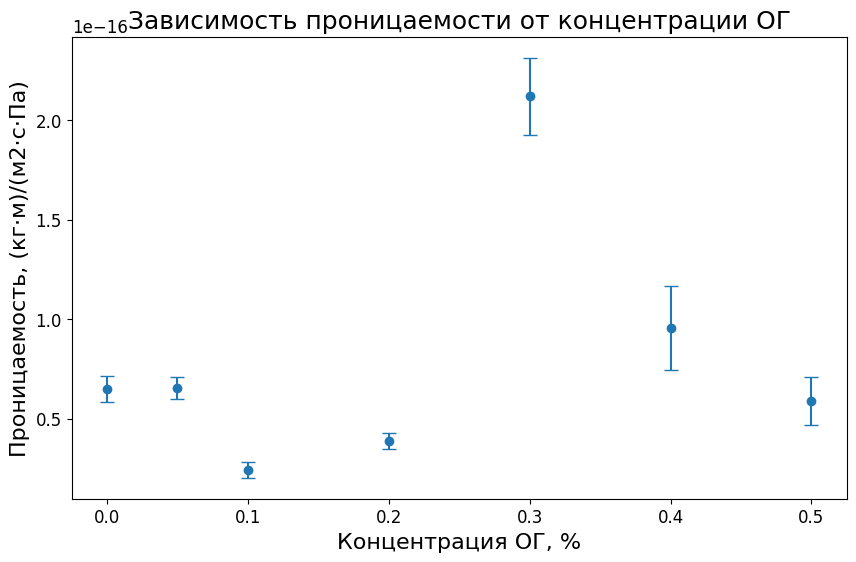

In [46]:
plt.figure(figsize=(10, 6))
plt.errorbar(df_K['concentration'], df_K['mean'], yerr=df_K['RMSE'], fmt='o', capsize=5)
plt.title('Зависимость проницаемости от концентрации ОГ')
plt.xlabel('Концентрация ОГ, %')
plt.ylabel('Проницаемость, (кг⋅м)/(м2⋅с⋅Па)')
plt.grid()
#plt.savefig(graph_directory / 'K_C')
plt.show()

# $J=\frac{\varepsilon r^2}{8* \eta \tau}\frac{\Delta P}{\Delta x} $

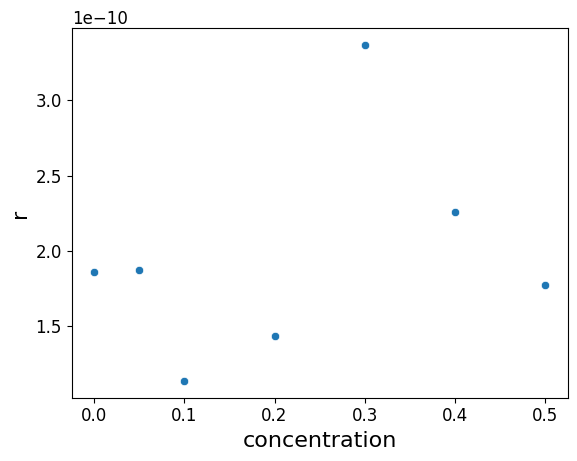

In [47]:
tau = 1
eta = 0.798 * 10**3 #Pa*s
delta_x = np.arange(1, 10, 1) * 10**(-6)
epsilon = 0.3
df_K['r'] = (df_K['mean'] * S * eta * tau / (p * epsilon))**(0.5)
sns.scatterplot(x='concentration', y='r', data=df_K)
plt.grid()

In [48]:
df_K

,concentration,Value 1,Value 2,Value 3,mean,RMSE,r
0,0.00,7.358856e-17,5.845365e-17,6.287097e-17,6.497106e-17,6.354744e-18,1.864085e-10
1,0.05,6.967905e-17,5.788162e-17,6.901892e-17,6.552653e-17,5.412481e-18,1.872037e-10
2,0.10,2.832882e-17,2.529315e-17,1.909354e-17,2.423850e-17,3.843331e-18,1.138567e-10
3,0.20,4.114157e-17,3.292858e-17,4.181269e-17,3.862761e-17,4.039129e-18,1.437324e-10
4,0.30,2.376174e-16,1.908773e-16,2.076588e-16,2.120512e-16,1.933266e-17,3.367643e-10
5,0.40,1.254605e-16,8.251907e-17,7.893820e-17,9.563926e-17,2.113742e-17,2.261642e-10
6,0.50,7.599189e-17,4.980503e-17,5.087377e-17,5.889023e-17,1.210057e-17,1.774710e-10


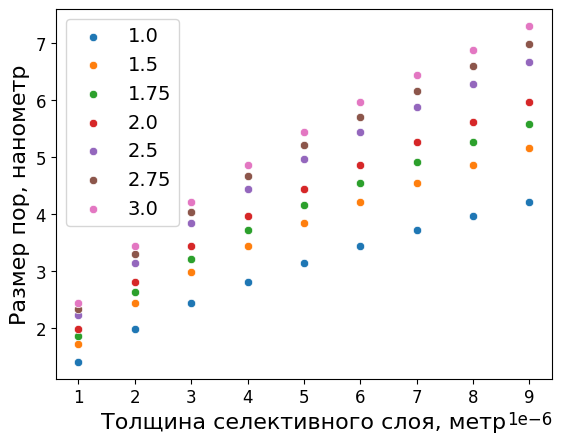

In [49]:
tau = np.array([1, 1.5, 1.75, 2.0, 2.5, 2.75, 3.0])
eta = 0.798 * 10**3 #Pa*s
delta_x = np.arange(1, 10, 1) * 10**(-6)
epsilon = 0.3
delta_P = np.arange(10, 20, 2) * 101325 # Pa
J = J_df['0%'][0]['J'].values[-1] * 10**(-6) # m^3/s
#print(f'tau = {tau}')
for i in range(7):
    r = (J * 8 * eta * tau[i] * delta_x / (epsilon * np.pi * delta_P[-1]))**(1/2) * 10**(9)
    sns.scatterplot(x=delta_x, y=r, label=tau[i])
    plt.legend()
    plt.grid()
    plt.xlabel('Толщина селективного слоя, метр')
    plt.ylabel('Размер пор, нанометр')
plt.show();

In [50]:
concentrations = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
m_psf = 4.7225 #g
m_go = m_psf * concentrations
ro_psf = 1.23 # g/sm^3
ro_go = 2 # g/sm^3
V_go = m_go / ro_go
V_psf = m_psf / ro_psf
phi_d = V_go / (V_go + V_psf)
phi_d = np.delete(phi_d, 0)
phi_d

array([0.02983265, 0.05793688, 0.10952805, 0.15576192, 0.19743178,
       0.23518164])

In [51]:
(phi_d).shape

(6,)

In [52]:
model_array = np.array(df_K['mean'][0])

$\tau = 1 + \frac{(\alpha \phi_d)^2}{1 - \phi_d} + \frac{\alpha \phi_d}{\sigma} + 2(1 - \phi_d) \ln\left(\frac{1 - \phi_d}{2\sigma \phi_d}\right)$

In [53]:
phi_d[1]

0.05793688177107866

In [54]:
tau

array([1.  , 1.5 , 1.75, 2.  , 2.5 , 2.75, 3.  ])

In [55]:
len(df_K)

7

In [56]:
tau

array([1.  , 1.5 , 1.75, 2.  , 2.5 , 2.75, 3.  ])

In [57]:
model_array.shape

()

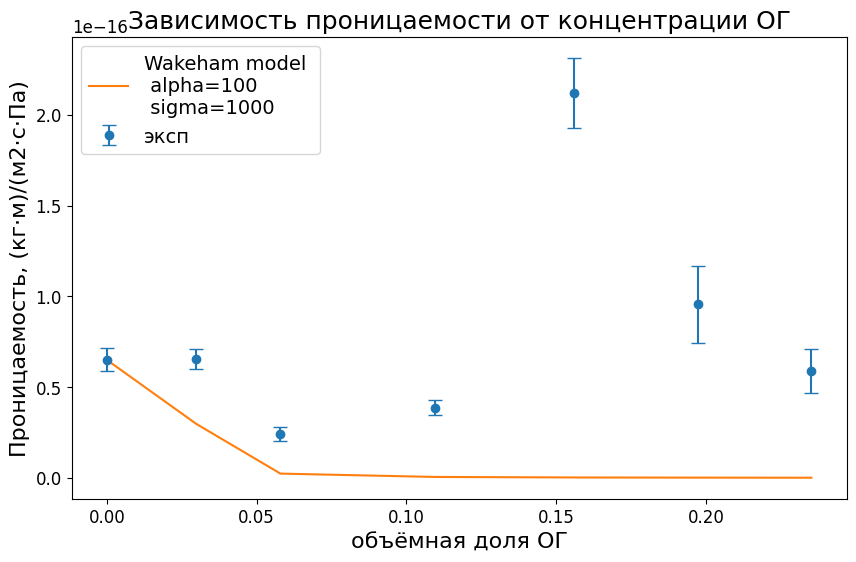

In [58]:
alpha = 100
sigma = 1000

concentrations = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
m_psf = 4.7225 #g
m_go = m_psf * concentrations
ro_psf = 1.23 # g/sm^3
ro_go = 2 # g/sm^3

V_go = m_go / ro_go
V_psf = m_psf / ro_psf
phi_d_ = V_go / (V_go + V_psf)

df_K['phi_d'] = phi_d_
phi_d_ = np.delete(phi_d_, 0)
#phi_d = np.linspace(0.001, 0.25, 10)
tau = 1 + (alpha * phi_d_)**(2) / (1 - phi_d_) + alpha * phi_d_ / sigma + 2 * (1 - phi_d_) * np.log((1 - phi_d_) / (2 * sigma * phi_d_))
model_array = np.concatenate((np.array([df_K['mean'][0]]), np.array(df_K['mean'][0]) / tau))


plt.figure(figsize=(10, 6))
plt.errorbar(df_K['phi_d'], df_K['mean'], yerr=df_K['RMSE'], fmt='o', capsize=5, label='эксп')
sns.lineplot(x=df_K['phi_d'], y=model_array, label=f'Wakeham model \n alpha={alpha} \n sigma={sigma}')
plt.title('Зависимость проницаемости от концентрации ОГ')
plt.xlabel('объёмная доля ОГ')
plt.ylabel('Проницаемость, (кг⋅м)/(м2⋅с⋅Па)')
plt.grid()
plt.legend()

In [59]:
np.mean(np.abs((df_K['mean'][1:] - model_array[1:]) / df_K['mean'][1:])) * 100

90.52331670112754

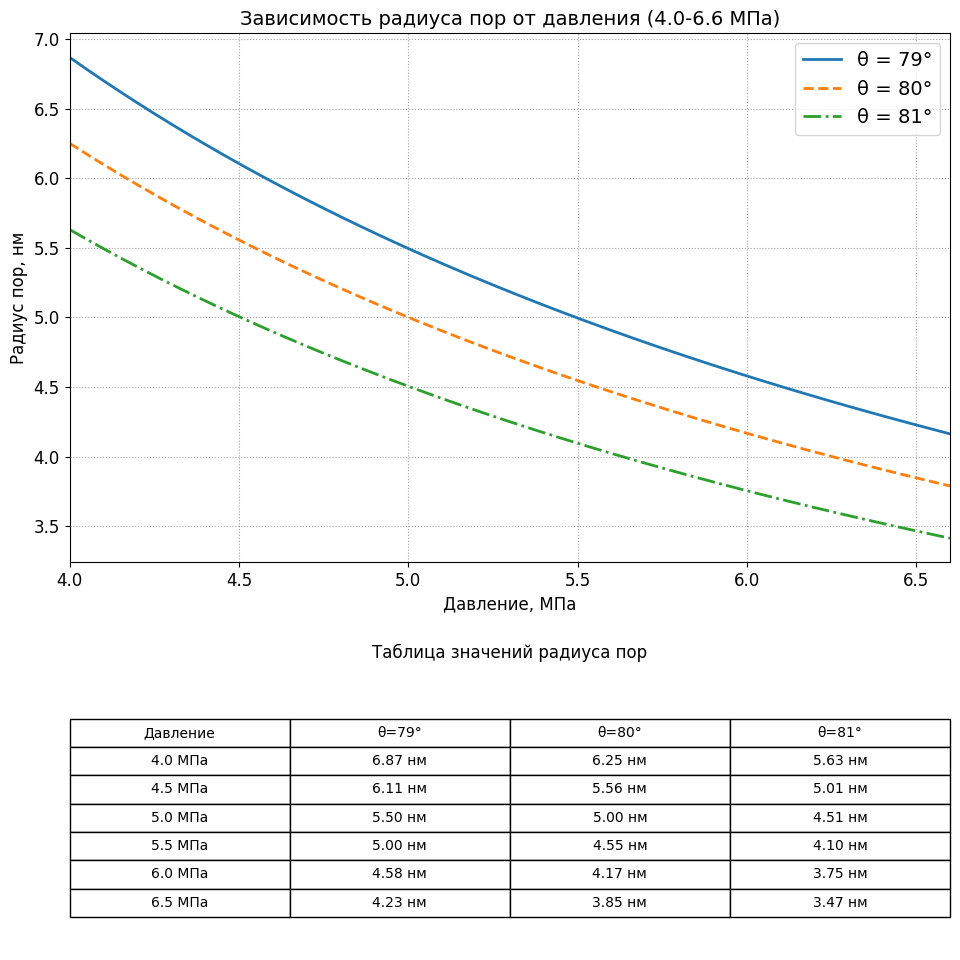


Таблица значений:
+------------+---------+---------+---------+
| Давление   | θ=79°   | θ=80°   | θ=81°   |
+============+=========+=========+=========+
| 4.0 МПа    | 6.87 нм | 6.25 нм | 5.63 нм |
+------------+---------+---------+---------+
| 4.5 МПа    | 6.11 нм | 5.56 нм | 5.01 нм |
+------------+---------+---------+---------+
| 5.0 МПа    | 5.50 нм | 5.00 нм | 4.51 нм |
+------------+---------+---------+---------+
| 5.5 МПа    | 5.00 нм | 4.55 нм | 4.10 нм |
+------------+---------+---------+---------+
| 6.0 МПа    | 4.58 нм | 4.17 нм | 3.75 нм |
+------------+---------+---------+---------+
| 6.5 МПа    | 4.23 нм | 3.85 нм | 3.47 нм |
+------------+---------+---------+---------+


In [60]:
from tabulate import tabulate

# Параметры системы
gamma = 0.072  # Поверхностное натяжение воды (Н/м) при 20°C
contact_angles = [79, 80, 81]  # Контактные углы в градусах
P_min, P_max = 4.0, 6.6  # Диапазон давлений (МПа)
P_values = np.linspace(P_min, P_max, 500)  # Линейная шкала

# Переводим давление в Па (1 МПа = 1e6 Па)
P_values_Pa = P_values * 1e6

# Переводим углы в радианы
theta_radians = [np.deg2rad(angle) for angle in contact_angles]

# Рассчитываем радиус пор для каждого угла
radius_curves = []
for theta in theta_radians:
    r = (2 * gamma * np.cos(theta)) / P_values_Pa
    radius_curves.append(r)

# Создаем фигуру с двумя subplots (график и таблица)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), 
                              gridspec_kw={'height_ratios': [2, 1]})

# Построение кривых
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
line_styles = ['-', '--', '-.']
for i, angle in enumerate(contact_angles):
    ax1.plot(P_values, radius_curves[i] * 1e9, 
             color=colors[i],
             linestyle=line_styles[i],
             linewidth=2,
             label=f'θ = {angle}°')

# Настройка графика
ax1.set_xlabel('Давление, МПа', fontsize=12)
ax1.set_ylabel('Радиус пор, нм', fontsize=12)
ax1.set_title('Зависимость радиуса пор от давления (4.0-6.6 МПа)', fontsize=14)
ax1.set_xlim(P_min, P_max)
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend()

# Создаем таблицу с шагом 0.5 МПа
table_pressures = np.arange(4.0, 6.6, 0.5)
table_data = []
for P in table_pressures:
    row = [f"{P:.1f} МПа"]
    for theta in theta_radians:
        r = (2 * gamma * np.cos(theta)) / (P * 1e6) * 1e9
        row.append(f"{r:.2f} нм")
    table_data.append(row)

# Отображаем таблицу
column_headers = ["Давление"] + [f"θ={angle}°" for angle in contact_angles]
table = ax2.table(cellText=table_data,
                 colLabels=column_headers,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax2.axis('off')
ax2.set_title('Таблица значений радиуса пор', fontsize=12, pad=20)

plt.tight_layout()
plt.show()

# Дополнительно выводим таблицу в консоль
print("\nТаблица значений:")
print(tabulate(table_data, headers=column_headers, tablefmt="grid"))